# 1.0 Full Exploratory Data Analysis

## Libraries

In [3]:
%load_ext autoreload
%autoreload 2

## cargar automaticamente funciones creadas

In [4]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/home/marcelamu/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Specify input and output files

In [5]:
input_covid_file = path.data_raw_dir('time_series_covid19_confirmed_global.csv')
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1117 entries, Province/State to 2/7/23
dtypes: float64(2), int64(1113), object(2)
memory usage: 2.5+ MB


### Process Data

In [7]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [8]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [9]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [16]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [17]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321079 entries, 0 to 321078
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  321079 non-null  object
 1   date            321079 non-null  object
 2   value           321079 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.3+ MB


In [18]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [19]:
sns.set_style("whitegrid")

In [20]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [21]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [47]:
import final_project.visualization.visualize as visualize

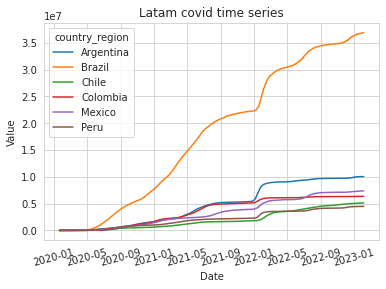

In [34]:
visualize.covid_time_series(df = some_latam_countries_df)

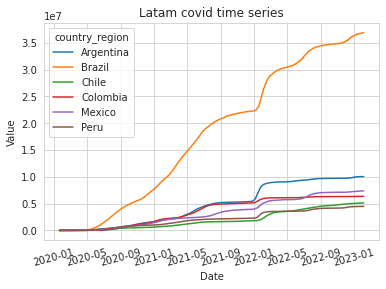

In [22]:
sns.lineplot(
    data=some_latam_countries_df,
    x="date",
    y="value",
    hue="country_region"
)

plt.xticks(rotation=15)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Latam covid time series");

#### Latam in global context

Top `n` countries.

In [23]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,50509163529,lightblue
1,India,27701136753,lightblue
2,Brazil,19998736177,red
3,France,14832216155,lightblue
4,Germany,12468190889,lightblue


Plot to Latam in highlighted bars.

esta es la grafica


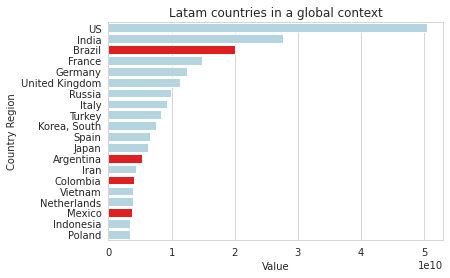

In [49]:
visualize.graph_top_countries_df(df =top_countries_df)